In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("driver.txt",sep = '\t', usecols = [1,2])
data.head(7)

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0
5,41.91,10.0
6,58.64,20.0


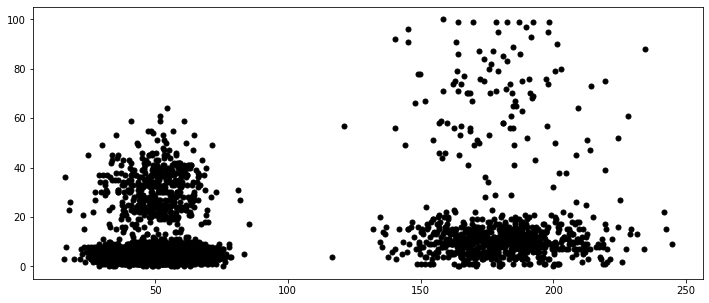

In [3]:
plt.figure(figsize = (12,5))
plt.plot(data.Distance_Feature, data.Speeding_Feature, '.', markersize = 10, color = "black")
plt.show()

In [4]:
mod_cluster = KMeans(n_clusters = 4)
mod_cluster

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
groups = mod_cluster.fit(data)
groups.cluster_centers_

array([[180.34311782,  10.52011494],
       [ 49.99263253,   5.20447169],
       [177.83509615,  70.28846154],
       [ 50.40482436,  32.36533958]])

In [6]:
classes = groups.fit_predict(data)
np.unique(classes)

data_draw = data
data_draw['class'] = classes
data_draw.head(5)

,Distance_Feature,Speeding_Feature,class
0,71.24,28.0,3
1,52.53,25.0,3
2,64.54,27.0,3
3,55.69,22.0,3
4,54.58,25.0,3


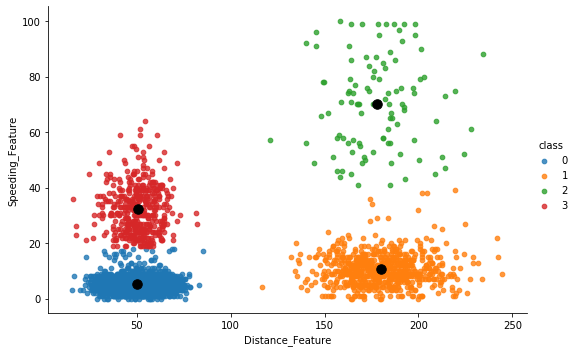

In [7]:
sns.lmplot(x = "Distance_Feature", y = "Speeding_Feature", data = data_draw, 
           hue = 'class',fit_reg=False, scatter_kws = {'s':22}, aspect = 1.5)
plt.scatter(groups.cluster_centers_.transpose()[0], 
            groups.cluster_centers_.transpose()[1], s = 90, color = 'black')

In [8]:
groups.cluster_centers_

array([[ 49.99263253,   5.20447169],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.40482436,  32.36533958]])

In [9]:
groups.cluster_centers_.transpose()[1]

array([ 5.20447169, 10.52011494, 70.28846154, 32.36533958])

In [10]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate machine learning with Scikit-Learn. 
The library implements a new core API object, the "Visualizer" that is a scikit-learn estimator: 
an object that learns from data. Like transformers or models, visualizers learn from data by creating a 
visual representation of the model selection workflow.
    
conda install -c districtdatalabs yellowbrick

metric:
distortion: mean sum of squared distances to centers
silhouette: mean ratio of intra-cluster and nearest-cluster distance
calinski_harabaz: ratio of within to between cluster dispersion

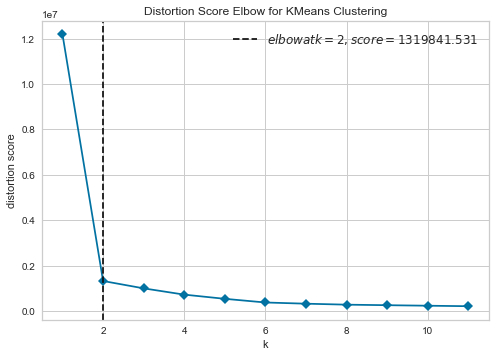

In [11]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(1,12), metric='distortion', timings=False
)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data